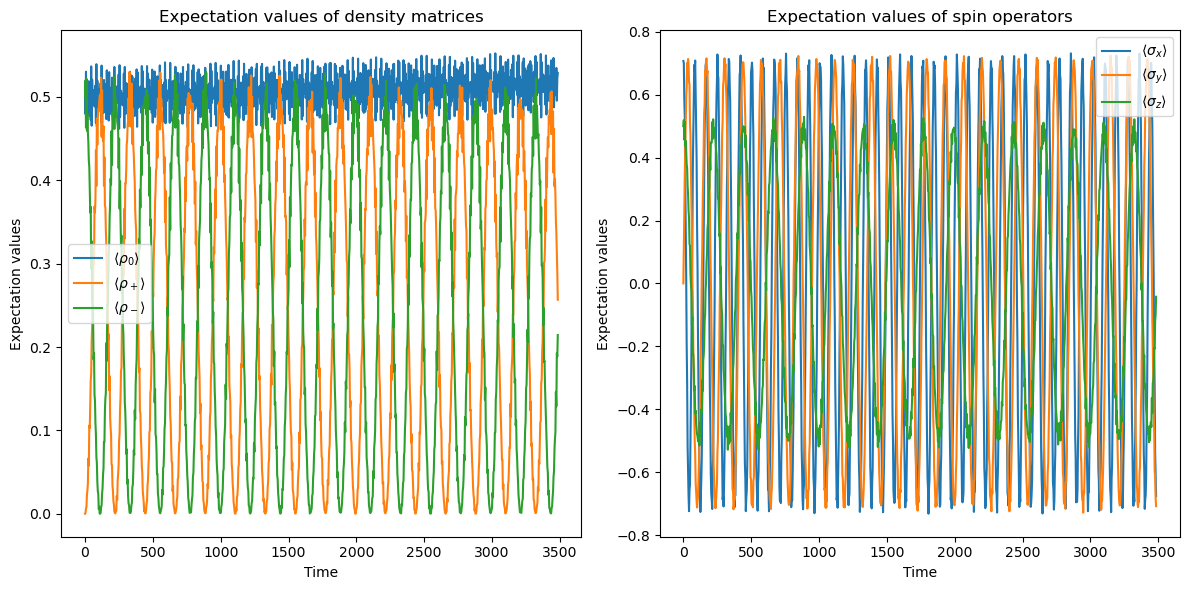

In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

D = 2.87
gamma_e = -28.03
_2PI = 2 * np.pi

B = 0.0
azimuthal = 0
polar = 0

mw_amplitude = 1
mw_frequency =  D

w01 = (D - gamma_e * B) * _2PI
# Time evolution of states using mesolve
times = np.linspace(0, _2PI/w01*10000, 1000)  # Time array

B_z = B * np.cos(np.radians(polar))
B_x = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
B_y = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))

state_zero = qt.basis(3, 1)
rho_zero = state_zero * state_zero.dag()
state_plus = qt.basis(3, 2)
rho_plus = state_plus * state_plus.dag()
state_minus = qt.basis(3, 0)
rho_minus = state_minus * state_minus.dag()

Sx = qt.jmat(1, 'x')
Sy = qt.jmat(1, 'y')
Sz = qt.jmat(1, 'z')

def pulse(t, args):
    return args['amp'] * np.sin(args['w'] * t)

pulse = lambda t, args={'w': 1.05, "amp": 1}: np.sin(args['w'] * t) * args['amp']


H0 = _2PI *D * Sz**2 + _2PI *gamma_e * (Sz * B_z +
                                 Sx * B_x +
                                 Sy * B_y)

#times = np.linspace(0, 5, 1000)

H = [H0, [Sx, pulse]]

# Solve the time evolution
result = qt.mesolve([H0, [Sx, pulse]], (state_zero + state_minus).unit(), times, args={'amp': mw_amplitude, 'w': mw_frequency})
#result = qt.mesolve(H0, (state_zero + state_minus).unit(), times)

#result = qt.mesolve([H0, [Sx, pulse]], state_zero, times, args={"w": w01*1.0, 'amp': 0.4})

# Calculate the expectation values
expect_rho_zero = qt.expect(rho_zero, result.states)
expect_rho_plus = qt.expect(rho_plus, result.states)
expect_rho_minus = qt.expect(rho_minus, result.states)

expect_sigma_x = qt.expect(Sx, result.states)
expect_sigma_y = qt.expect(Sy, result.states)
expect_sigma_z = qt.expect(Sz, result.states)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the expectation values of the density matrices
plt.subplot(1, 2, 1)
plt.plot(times, expect_rho_zero, label=r'$\langle \rho_0 \rangle$')
plt.plot(times, expect_rho_plus, label=r'$\langle \rho_+ \rangle$')
plt.plot(times, expect_rho_minus, label=r'$\langle \rho_- \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title('Expectation values of density matrices')
plt.legend()

# Plot the expectation values of the spin operators
plt.subplot(1, 2, 2)
plt.plot(times, expect_sigma_x, label=r'$\langle \sigma_x \rangle$')
plt.plot(times, expect_sigma_y, label=r'$\langle \sigma_y \rangle$')
plt.plot(times, expect_sigma_z, label=r'$\langle \sigma_z \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title('Expectation values of spin operators')
plt.legend()

plt.tight_layout()
plt.show()

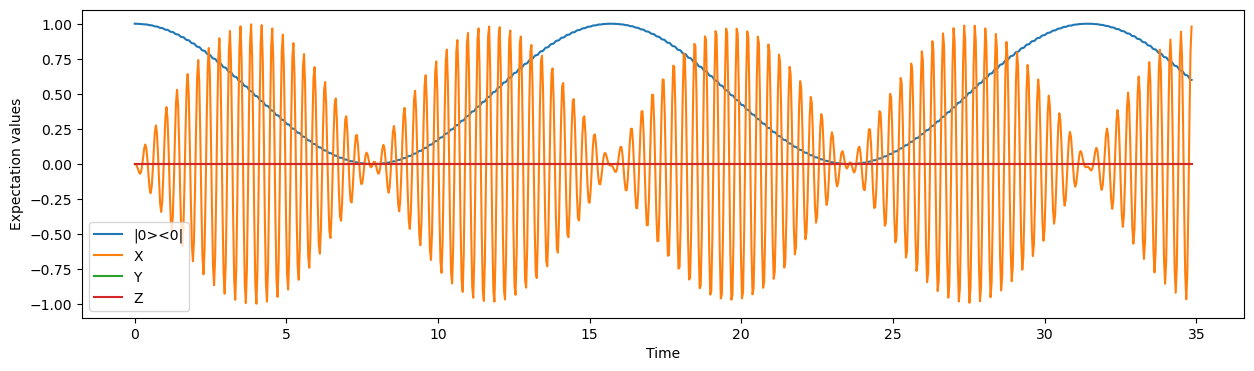

In [54]:
pulse = lambda t, args: np.sin(args['w'] * t) * args['amp']

B = 0
H = (D * (Sz**2) + gamma_e * B * Sz) * _2PI
w01 = (D - gamma_e * B) * _2PI
# Time evolution of states using mesolve
times = np.linspace(0, _2PI/w01*100, 1000)  # Time array
initial_state = qt.basis(3, 1)  # Initial state
# initial_state = (qt.basis(3, 1) + qt.basis(3, 0)).unit()  # Initial state

# Solve the Schrodinger equation
result = qt.mesolve([H, [Sx, pulse]], initial_state, times, args={"w": w01*1.0, 'amp': 0.4})
#result = qt.mesolve(H0, initial_state, times, args={"w": w01*1.0, 'amp': 0.4})

exp_0 = [qt.expect(initial_state * initial_state.dag(), state) for state in result.states]
exp_sz = [qt.expect(Sz, state) for state in result.states]
exp_sy = [qt.expect(Sy, state) for state in result.states]
exp_sx = [qt.expect(Sx, state) for state in result.states]

# Plot results
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(times, exp_0, label='|0><0|')
ax.plot(times, exp_sx, label='X')
ax.plot(times, exp_sy, label='Y')
ax.plot(times, exp_sz, label='Z')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend()
plt.show()

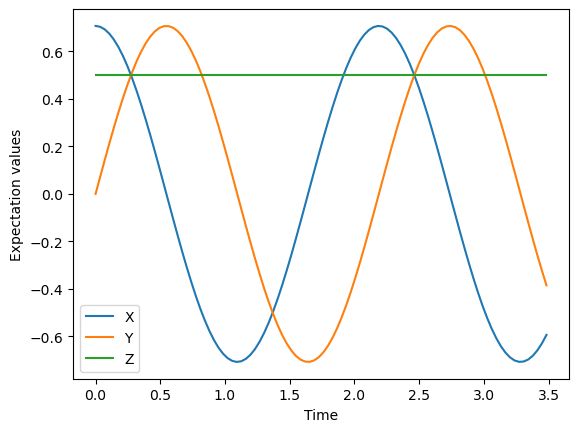

In [47]:
# Time evolution of states using mesolve
t = np.linspace(0, _2PI*10/w01, 100)  # Time array
initial_state = qt.basis(3, 1)  # Initial state

initial_state = (qt.basis(3, 1) + qt.basis(3, 0)).unit()  # Initial state

H = H0

# Solve the Schrodinger equation
result = qt.mesolve(H, initial_state, t)

exp_sz = [qt.expect(Sz, state) for state in result.states]
exp_sy = [qt.expect(Sy, state) for state in result.states]
exp_sx = [qt.expect(Sx, state) for state in result.states]

# Plot results
fig, ax = plt.subplots()
ax.plot(t, exp_sx, label='X')
ax.plot(t, exp_sy, label='Y')
ax.plot(t, exp_sz, label='Z')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend()
plt.show()

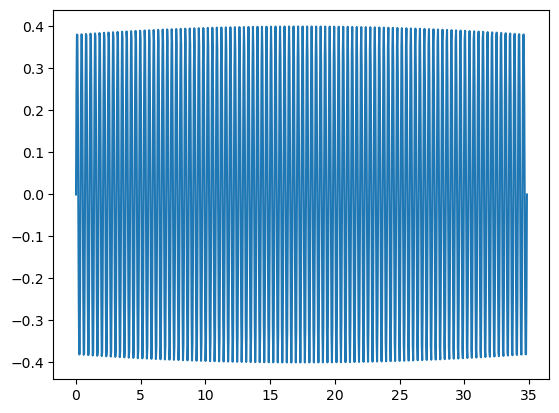

In [56]:
plt.plot(times, pulse(times, args={"w": w01*1.0, 'amp': 0.4}))